<a href="https://colab.research.google.com/github/khloodram/trial/blob/main/BIOT_5206_Spring_2023_Irf6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BIOT 5206 - Spring 2023 - Gene Expression Analysis Using R (Irf6)
---

In [ ]:
data = read.table("https://media.githubusercontent.com/media/ahmedmoustafa/gene-expression-datasets/main/datasets/irf6/irf6.tsv", header = TRUE, row.names = 1)
head(data)

,KO1,KO2,KO3,WT1,WT2,WT3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1415670_at,6531.0,5562.8,6822.4,7732.1,7191.2,7551.9
1415671_at,11486.3,10542.7,10641.4,10408.2,9484.5,7650.2
1415672_at,14339.2,13526.1,14444.7,12936.6,13841.7,13285.7
1415673_at,3156.8,2219.5,3264.4,2374.2,2201.8,2525.3
1415674_a_at,4002.0,3306.9,3777.0,3760.6,3137.0,2911.5
1415675_at,3468.4,3347.4,3332.9,3073.5,3046.0,2914.4


In [ ]:
data = as.matrix(data)
head(data)

,KO1,KO2,KO3,WT1,WT2,WT3
1415670_at,6531.0,5562.8,6822.4,7732.1,7191.2,7551.9
1415671_at,11486.3,10542.7,10641.4,10408.2,9484.5,7650.2
1415672_at,14339.2,13526.1,14444.7,12936.6,13841.7,13285.7
1415673_at,3156.8,2219.5,3264.4,2374.2,2201.8,2525.3
1415674_a_at,4002.0,3306.9,3777.0,3760.6,3137.0,2911.5
1415675_at,3468.4,3347.4,3332.9,3073.5,3046.0,2914.4


In [ ]:
dim(data)

[1] 45101     6

In [ ]:
number_of_genes = nrow(data) # number of genes = number of rows
number_of_genes

[1] 45101

In [ ]:
ids = row.names(data) # The ids of the genes are the names of the rows
head(ids)

[1] "1415670_at"   "1415671_at"   "1415672_at"   "1415673_at"   "1415674_a_at"
[6] "1415675_at"

In [ ]:
length(ids)

[1] 45101

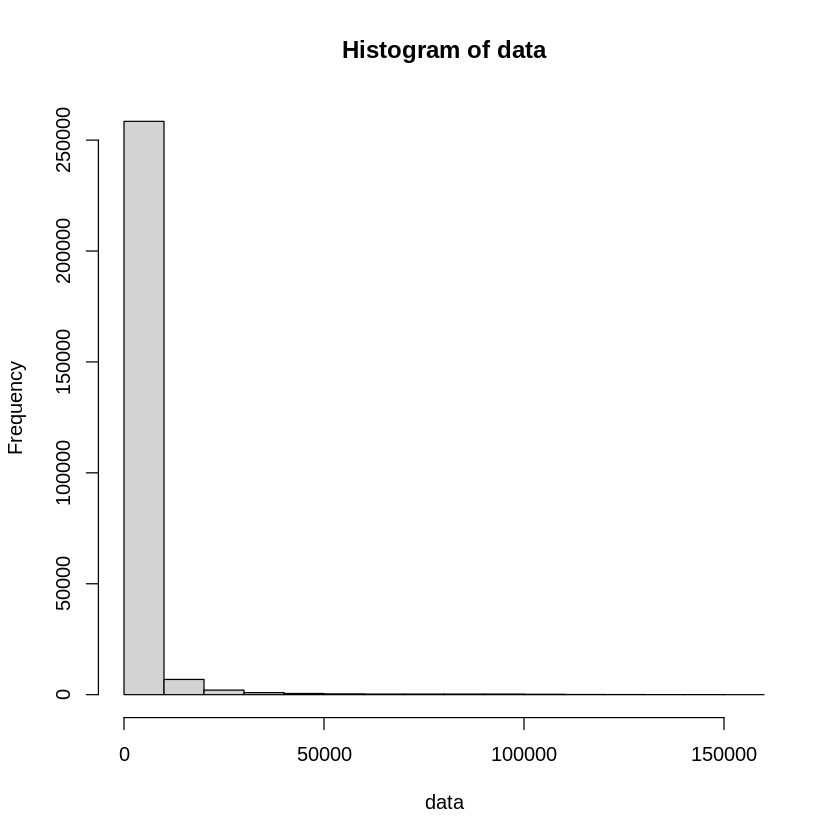

In [ ]:
hist(data)

In [ ]:
log10(1000)

[1] 3

In [ ]:
log2(8)

[1] 3

In [ ]:
x_wt = 1000
x_ko = 100
x_ko/x_wt

[1] 0.1

In [ ]:
x_wt = 100
x_ko = 1000
x_ko/x_wt

[1] 10

In [ ]:
x_wt_log10 = 3
x_ko_log10 = 2
x_ko_log10 - x_wt_log10

[1] -1

In [ ]:
x_wt_log10 = 2
x_ko_log10 = 3
x_ko_log10 - x_wt_log10

[1] 1

In [ ]:
data2=log2(data)

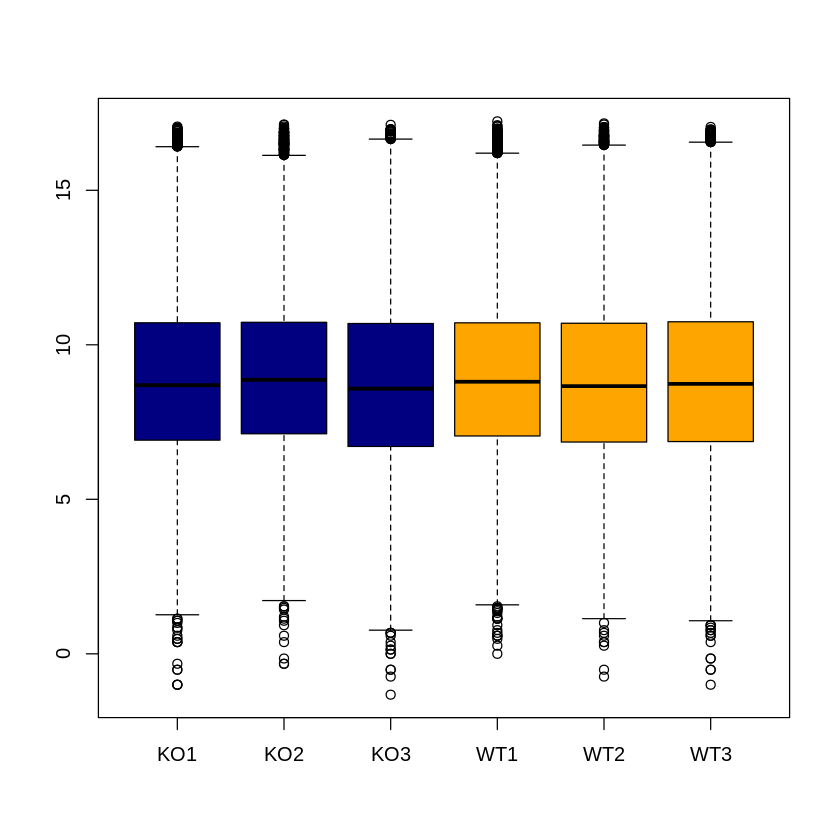

In [ ]:
colors = c(rep("navy", 3), rep("orange", 3))
boxplot(data2, col = colors)

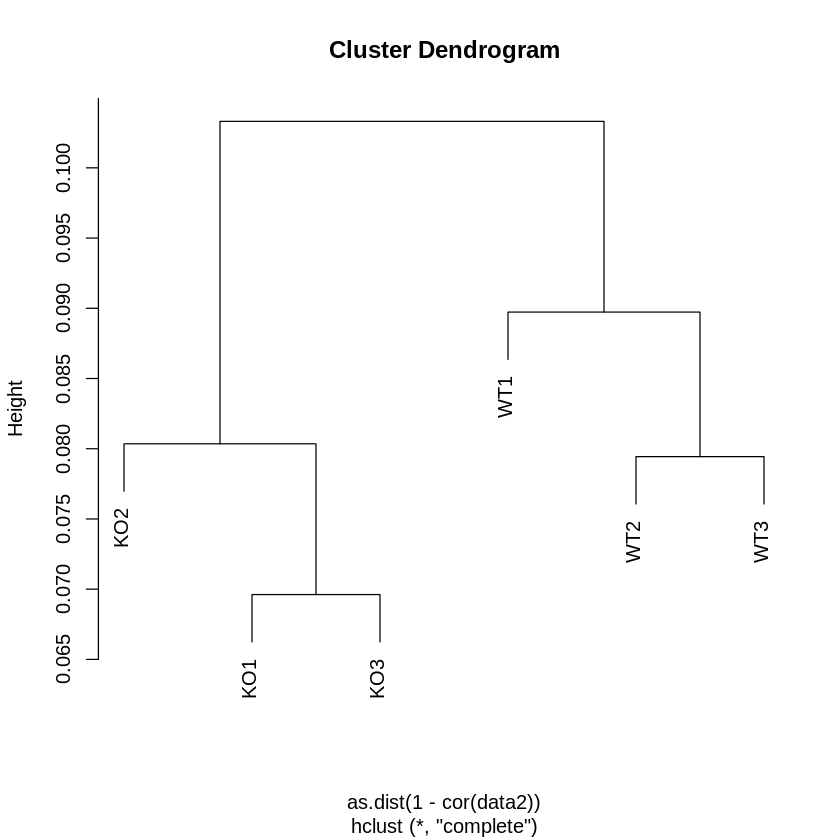

In [ ]:
hc = hclust(as.dist(1 - cor(data2)))
plot(hc)

In [ ]:
cor(data2)

,KO1,KO2,KO3,WT1,WT2,WT3
KO1,1.0000000,0.9197786,0.9303834,0.9080694,0.9034781,0.9093299
KO2,0.9197786,1.0000000,0.9196488,0.9019536,0.8966889,0.9005613
KO3,0.9303834,0.9196488,1.0000000,0.9089820,0.9077829,0.9141832
WT1,0.9080694,0.9019536,0.9089820,1.0000000,0.9102686,0.9144847
WT2,0.9034781,0.8966889,0.9077829,0.9102686,1.0000000,0.9205639
WT3,0.9093299,0.9005613,0.9141832,0.9144847,0.9205639,1.0000000


In [ ]:
1-cor(data2)

,KO1,KO2,KO3,WT1,WT2,WT3
KO1,0.00000000,0.08022138,0.06961659,0.09193061,0.09652188,0.09067015
KO2,0.08022138,0.00000000,0.08035124,0.09804638,0.10331111,0.09943865
KO3,0.06961659,0.08035124,0.00000000,0.09101801,0.09221709,0.08581682
WT1,0.09193061,0.09804638,0.09101801,0.00000000,0.08973135,0.08551534
WT2,0.09652188,0.10331111,0.09221709,0.08973135,0.00000000,0.07943607
WT3,0.09067015,0.09943865,0.08581682,0.08551534,0.07943607,0.00000000


In [ ]:
ko = data2[, 1:3] # KO matrix
head(ko)

,KO1,KO2,KO3
1415670_at,12.67309,12.44160,12.73606
1415671_at,13.48763,13.36396,13.37740
1415672_at,13.80768,13.72346,13.81825
1415673_at,11.62425,11.11602,11.67260
1415674_a_at,11.96651,11.69126,11.88303
1415675_at,11.76005,11.70883,11.70256


In [ ]:
wt = data2[, 4:6] # WT matrix
head(wt)

,WT1,WT2,WT3
1415670_at,12.91664,12.81202,12.88262
1415671_at,13.34543,13.21136,12.90128
1415672_at,13.65917,13.75673,13.69759
1415673_at,11.21323,11.10447,11.30224
1415674_a_at,11.87675,11.61517,11.50755
1415675_at,11.58567,11.57270,11.50898


In [ ]:
ko.means = rowMeans(ko)
head(ko.means)

1415670_at   1415671_at   1415672_at   1415673_at 1415674_a_at   1415675_at 
    12.61692     13.40966     13.78313     11.47096     11.84693     11.72381

In [ ]:
wt.means = rowMeans(wt)
head(wt.means)

1415670_at   1415671_at   1415672_at   1415673_at 1415674_a_at   1415675_at 
    12.87043     13.15269     13.70450     11.20664     11.66649     11.55578

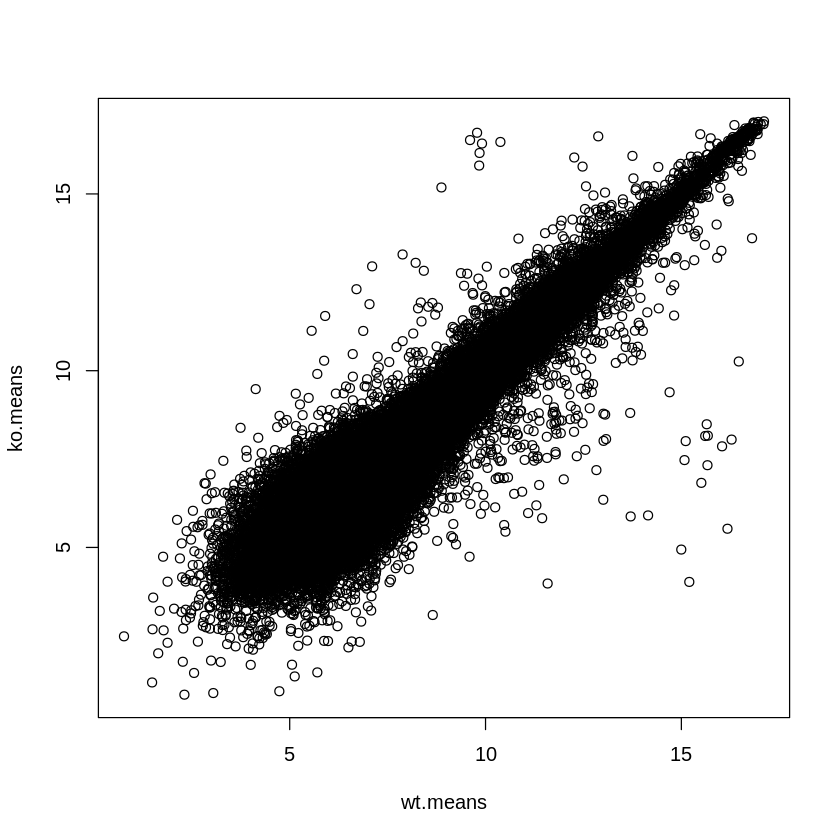

In [ ]:
plot(ko.means ~ wt.means)

In [ ]:
fold = ko.means - wt.means # Difference between means
head(fold)

1415670_at   1415671_at   1415672_at   1415673_at 1415674_a_at   1415675_at 
 -0.25351267   0.25697097   0.07863227   0.26431191   0.18044345   0.16803065

In [ ]:
length(fold)

[1] 45101

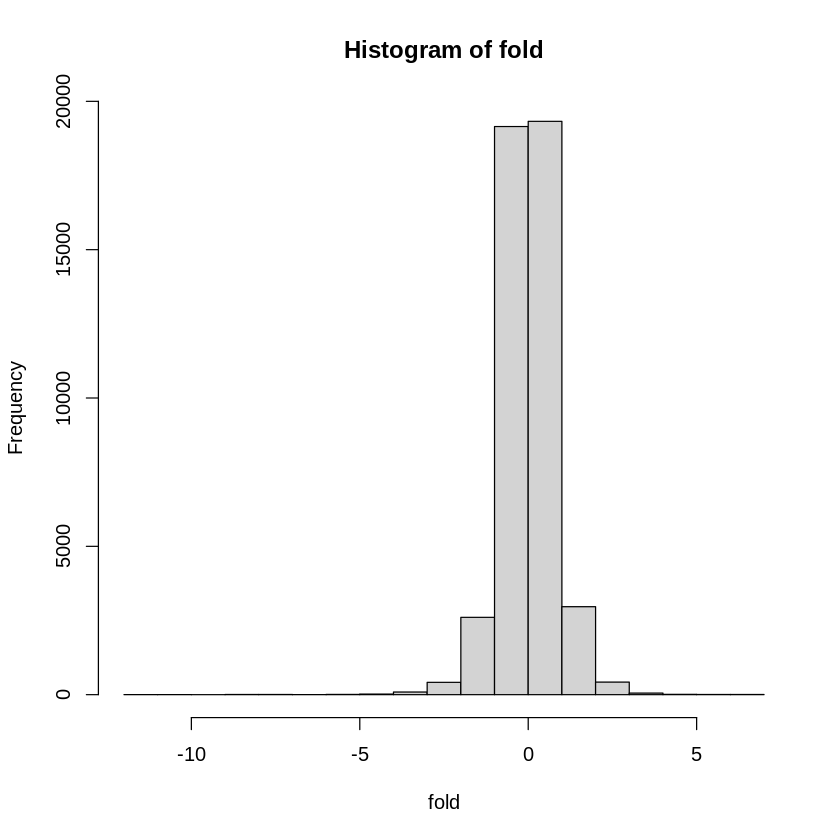

In [ ]:
hist(fold)

In [ ]:
x = c(4, 3, 10, 7, 9) ; y = c(7, 4, 3, 8, 10)
t.test(x, y)


	Welch Two Sample t-test

data:  x and y
t = 0.1066, df = 7.9743, p-value = 0.9177
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -4.12888  4.52888
sample estimates:
mean of x mean of y 
      6.6       6.4 


In [ ]:
t.test(x, y)$p.value

[1] 0.917739

In [ ]:
pvalue = NULL

for(i in 1 : number_of_genes) {
  x = wt[i, ]
  y = ko[i, ]
  pvalue[i] = t.test(x, y)$p.value
}

head(pvalue)

[1] 0.092706280 0.182663337 0.129779075 0.272899180 0.262377176 0.005947807

In [ ]:
length(pvalue)

[1] 45101

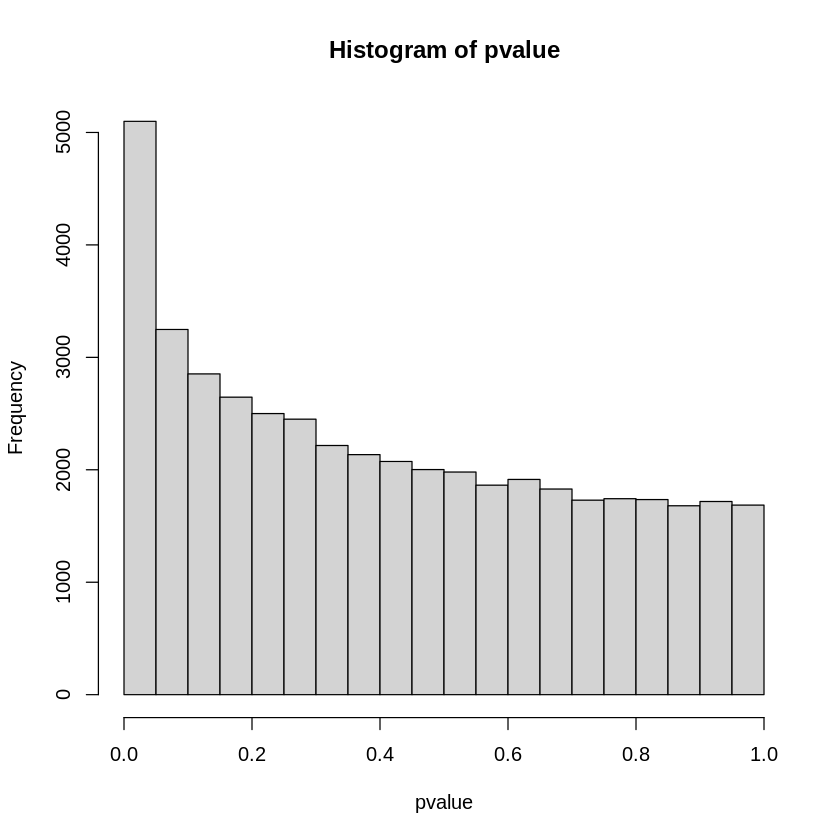

In [ ]:
hist(pvalue)

In [ ]:
-log10(1)

[1] 0

In [ ]:
-log10(0.1)

[1] 1

In [ ]:
-log10(0.01)

[1] 2

In [ ]:
-log10(0.001)

[1] 3

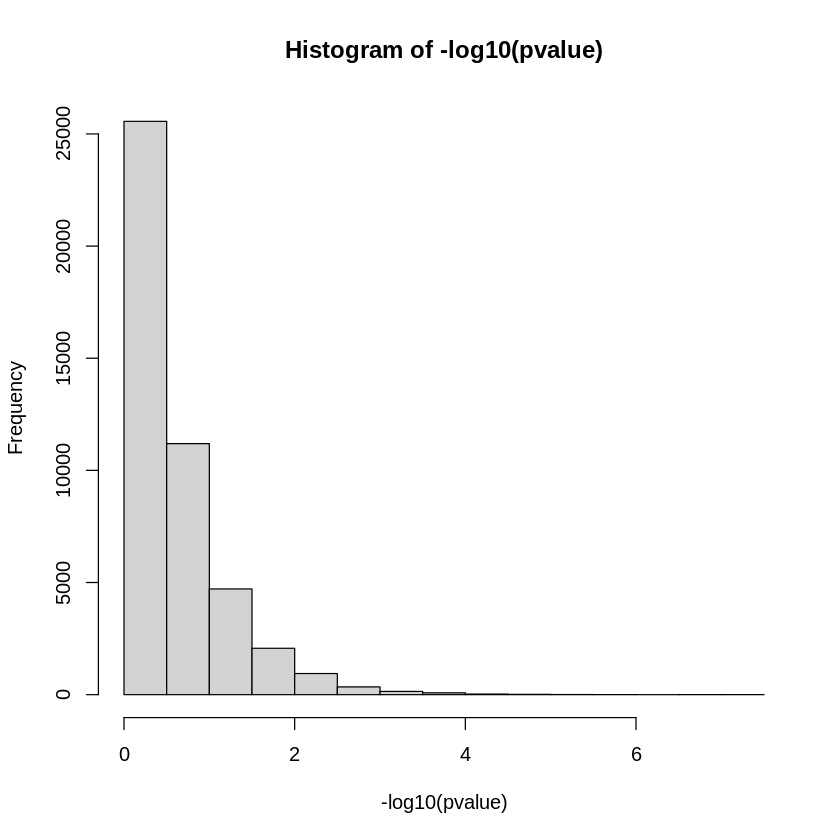

In [ ]:
hist(-log10(pvalue))

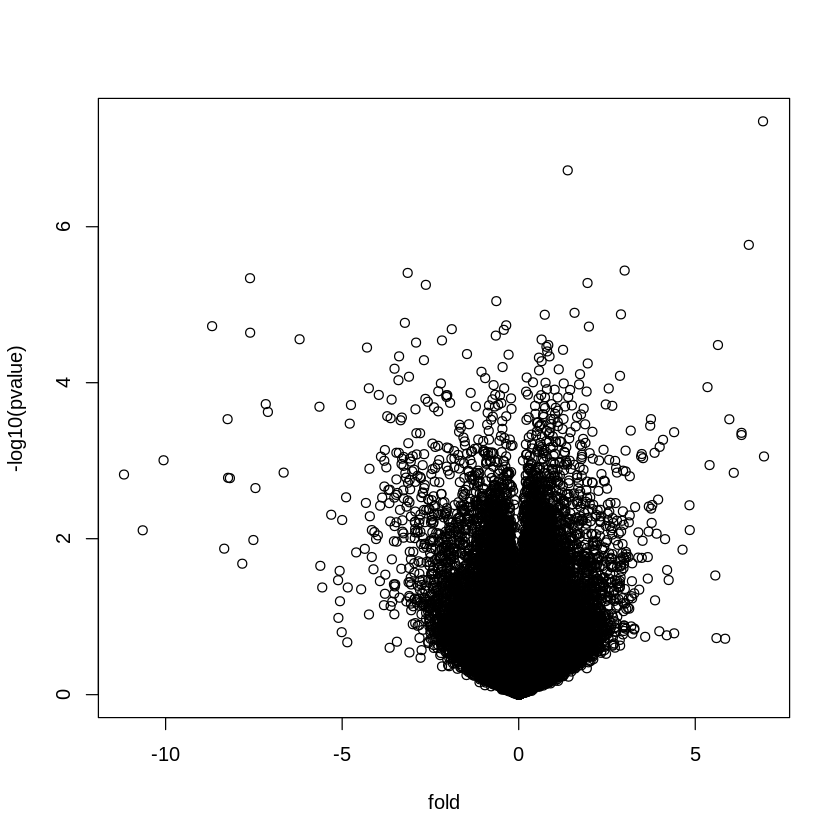

In [ ]:
plot(-log10(pvalue) ~ fold)

In [ ]:
fold_cutoff = 2
pvalue_cutoff = 0.01

In [ ]:
filter_by_fold = abs(fold) >= fold_cutoff # Biological
sum(filter_by_fold)

[1] 1051

In [ ]:
head(as.data.frame(filter_by_fold))

,filter_by_fold
,<lgl>
1415670_at,FALSE
1415671_at,FALSE
1415672_at,FALSE
1415673_at,FALSE
1415674_a_at,FALSE
1415675_at,FALSE


In [ ]:
filter_by_pvalue = pvalue <= pvalue_cutoff # Statistical
sum(filter_by_pvalue)

[1] 1564

In [ ]:
filter_combined = filter_by_fold & filter_by_pvalue # Combined
sum(filter_combined)

[1] 276

In [ ]:
head(as.data.frame(filter_combined))

,filter_combined
,<lgl>
1415670_at,FALSE
1415671_at,FALSE
1415672_at,FALSE
1415673_at,FALSE
1415674_a_at,FALSE
1415675_at,FALSE


In [ ]:
filtered = data2[filter_combined, ]
dim(filtered)

[1] 276   6

In [ ]:
head(filtered)

,KO1,KO2,KO3,WT1,WT2,WT3
1416200_at,13.312004,12.973357,12.868456,7.40429,8.558803,8.683696
1416236_a_at,14.148397,14.039236,14.130007,12.23604,12.022402,11.495056
1417808_at,5.321928,5.442943,4.053111,15.16978,15.070087,14.753274
1417932_at,10.602884,10.257152,10.496055,13.98445,14.203294,13.720960
1418050_at,10.622052,10.975490,10.795066,12.86513,13.012048,12.658122
1418100_at,9.117903,8.634811,9.057721,12.90358,12.842449,12.233769


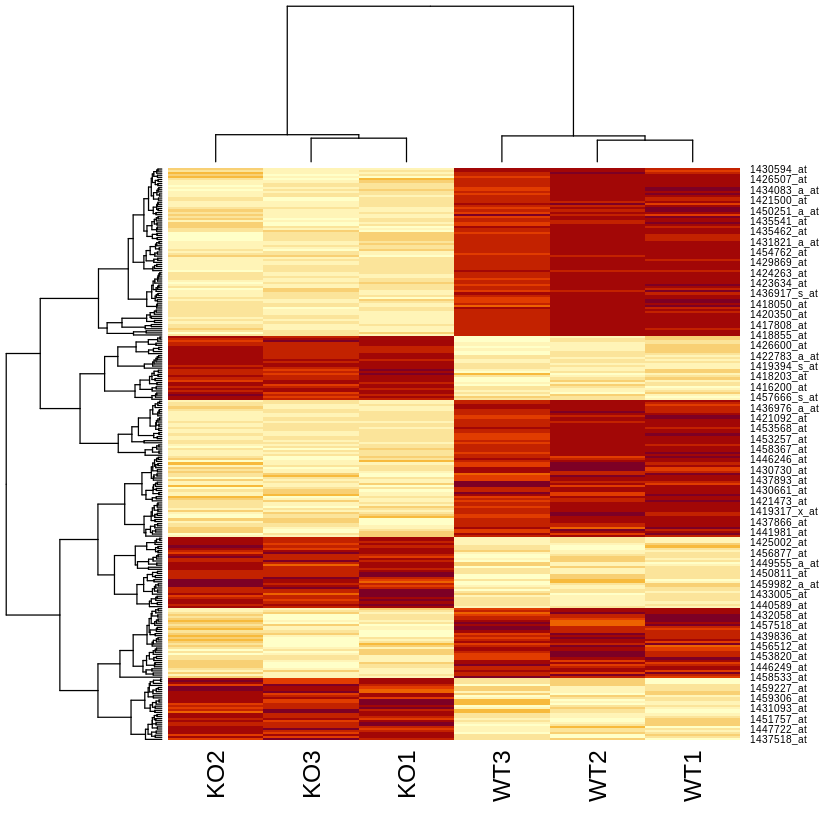

In [ ]:
heatmap(filtered)

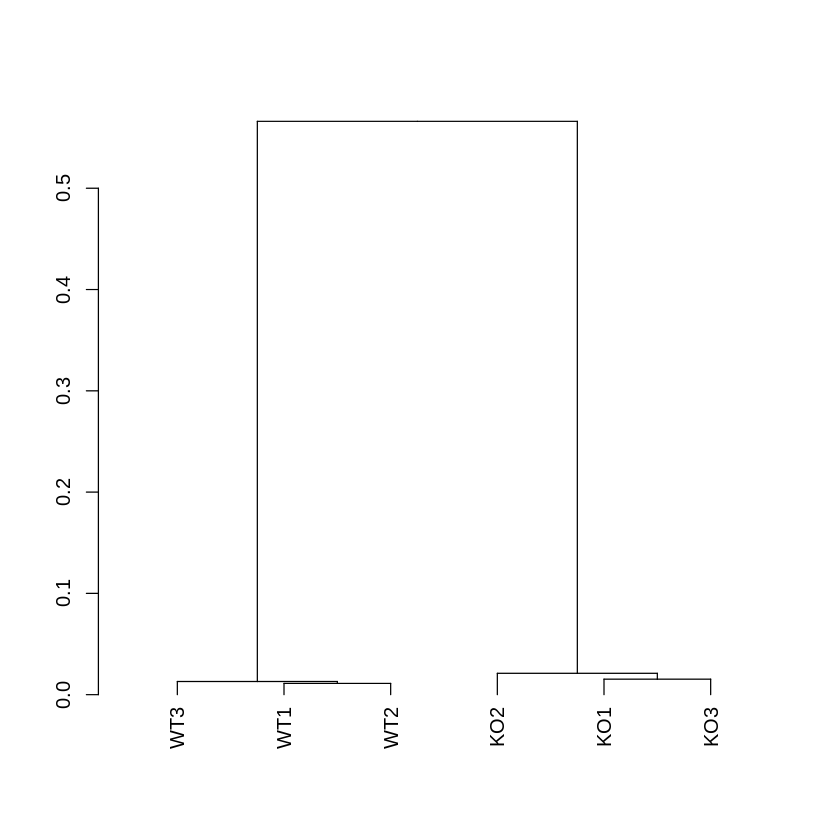

In [ ]:
col_dendrogram = as.dendrogram(hclust(as.dist(1-cor(filtered)))) # Clustering of the columns (samples)
plot(col_dendrogram)

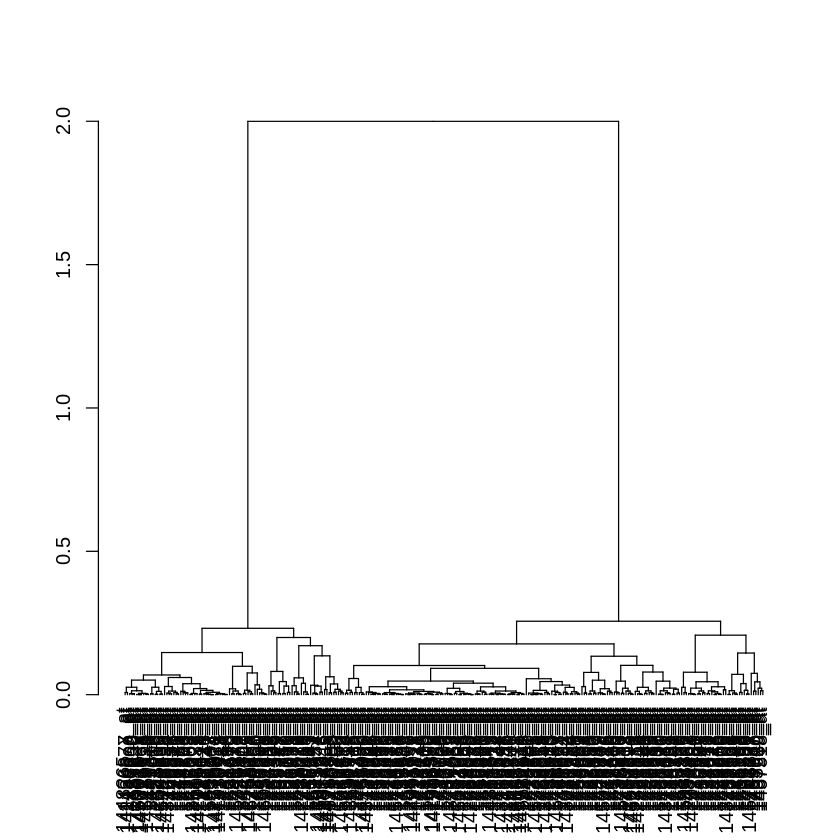

In [ ]:
row_dendrogram = as.dendrogram(hclust(as.dist(1-cor(t(filtered))))) # Clustering of the rows (genes)
plot(row_dendrogram)

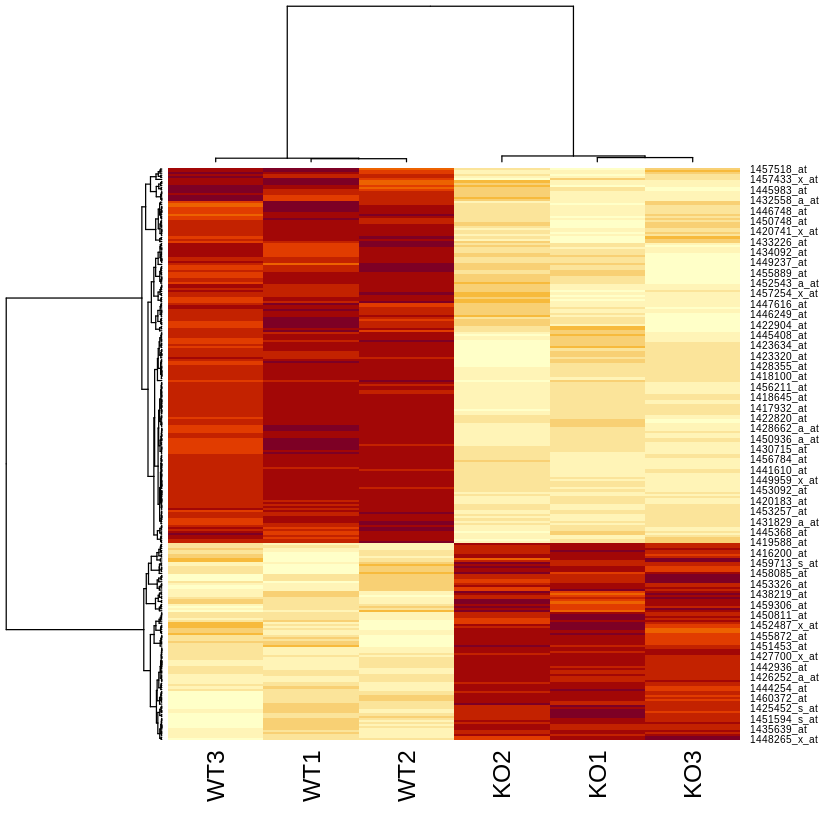

In [ ]:
heatmap(filtered, Rowv=row_dendrogram, Colv=col_dendrogram)